In [1]:
import re
import jieba
import nltk
import os
from nltk.corpus import stopwords
import requests

# -------------------------- 初始化资源 --------------------------
# 解决NLTK停用词下载的网络问题，增加备用方案
def init_english_stopwords():
    """初始化英文停用词，增加网络容错和备用列表"""
    try:
        # 设置清华镜像源，解决下载超时问题
        os.environ['NLTK_DATA'] = os.path.expanduser('~/nltk_data')
        nltk.download('stopwords', 
                      download_dir=os.environ['NLTK_DATA'],
                      url='https://mirrors.tuna.tsinghua.edu.cn/nltk_data/',
                      timeout=60)
        return set(stopwords.words('english'))
    except Exception as e:
        print(f"NLTK停用词下载失败，使用备用列表: {e}")
        # 备用英文停用词列表（无需下载NLTK资源）
        basic_stopwords = {
            'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
            "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he',
            'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's",
            'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
            'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
            'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do',
            'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
            'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
            'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below',
            'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
            'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
            'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
            'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very'
        }
        return basic_stopwords

# 获取哈工大中文停用词表（在线获取+本地备用）
def get_hit_stopwords():
    """获取哈工大停用词表，增加异常处理"""
    try:
        # 哈工大停用词表在线地址
        url = "https://file.hankcs.com/corpus/stopwords/hit_stopwords.txt"
        response = requests.get(url, timeout=10)
        response.encoding = 'utf-8'
        stopwords_list = [word.strip() for word in response.text.splitlines() if word.strip()]
        return set(stopwords_list)
    except Exception as e:
        print(f"获取哈工大停用词表失败，使用本地精简版: {e}")
        # 本地精简版备用（覆盖常用停用词）
        basic_stopwords = {
            '的', '了', '在', '是', '我', '有', '和', '就', '不', '人', '都', '一', '一个', 
            '上', '也', '很', '到', '说', '要', '去', '你', '会', '着', '没有', '看', '好', 
            '自己', '这', '那', '他', '她', '它', '我们', '你们', '他们', '这里', '那里'
        }
        return basic_stopwords

# 初始化停用词集合（使用优化后的初始化函数）
EN_STOPWORDS = init_english_stopwords()
ZH_STOPWORDS = get_hit_stopwords()

# -------------------------- 核心清洗函数 --------------------------
def clean_english_text(text):
    """
    清洗英文文本
    :param text: 原始英文文本
    :return: 清洗后的词列表
    """
    # 1. 转换为小写
    text_lower = text.lower()
    
    # 2. 去除标点符号（保留字母和空格）
    text_no_punct = re.sub(r'[^a-zA-Z\s]', '', text_lower)
    
    # 3. 分词（按空格分割）并去除空字符串
    words = [word.strip() for word in text_no_punct.split() if word.strip()]
    
    # 4. 去除停用词
    clean_words = [word for word in words if word not in EN_STOPWORDS]
    
    return clean_words

def clean_chinese_text(text):
    """
    清洗中文文本
    :param text: 原始中文文本
    :return: 清洗后的词列表
    """
    # 1. 去除标点符号和特殊字符（保留中文字符）
    text_no_punct = re.sub(r'[^\u4e00-\u9fa5]', '', text)
    
    # 2. jieba 分词
    words = jieba.lcut(text_no_punct)
    
    # 3. 去除停用词和空字符串
    clean_words = [word for word in words if word.strip() and word not in ZH_STOPWORDS]
    
    return clean_words

# -------------------------- 测试示例 --------------------------
if __name__ == "__main__":
    # 测试英文文本
    en_text = """
    The quick brown fox jumps over the lazy dog! This is a sample English news text, including punctuation, StopWords and uppercase letters.
    """
    en_cleaned = clean_english_text(en_text)
    print("=== 英文清洗结果 ===")
    print(en_cleaned)
    
    # 测试中文文本
    zh_text = """
    从前有一只小白兔，它住在美丽的森林里。这是一段中文小说文本，包含标点、停用词和无关字符！
    """
    zh_cleaned = clean_chinese_text(zh_text)
    print("\n=== 中文清洗结果 ===")
    print(zh_cleaned)

NLTK停用词下载失败，使用备用列表: Downloader.download() got an unexpected keyword argument 'url'


Building prefix dict from the default dictionary ...


=== 英文清洗结果 ===
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'sample', 'english', 'news', 'text', 'including', 'punctuation', 'stopwords', 'uppercase', 'letters']


Dumping model to file cache /var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/jieba.cache
Loading model cost 0.328 seconds.
Prefix dict has been built successfully.



=== 中文清洗结果 ===
['从前', '有', '一只', '小白兔', '它', '住', '在', '美丽', '的', '森林', '里', '这', '是', '一段', '中文', '小说', '文本', '包含', '标点', '停', '用词', '和', '无关', '字符']


In [1]:
import re
import jieba
import nltk
import os
from nltk.corpus import stopwords
from nltk.corpus.reader import WordListCorpusReader
import requests

# -------------------------- 加载本地手动下载的stopwords（官方资源） --------------------------
def load_local_nltk_stopwords():
    """加载本地手动下载的NLTK stopwords文件夹，确保使用官方资源"""
    # 你手动下载的stopwords文件夹路径
    local_stopwords_path = "/Users/limengyan/Downloads/stopwords"
    
    # 1. 验证路径是否存在
    if not os.path.exists(local_stopwords_path):
        raise FileNotFoundError(
            f"找不到本地stopwords文件夹！请确认路径：{local_stopwords_path}\n"
            "正确路径应包含english等文件，解压后的结构是：stopwords/english、stopwords/spanish等"
        )
    
    # 2. 验证核心文件（english停用词）是否存在
    english_stopwords_file = os.path.join(local_stopwords_path, "english")
    if not os.path.exists(english_stopwords_file):
        raise FileNotFoundError(
            f"本地文件夹缺少核心文件：{english_stopwords_file}\n"
            "请确认解压的是NLTK官方stopwords.zip，里面应包含english、chinese等语言的停用词文件"
        )
    
    # 3. 直接加载本地路径的停用词
    # 创建自定义的CorpusReader，加载本地文件
    stopwords_reader = WordListCorpusReader(root=local_stopwords_path, fileids=["english"])
    en_stop = set(stopwords_reader.words())
    
    print(f"✅ 成功加载本地官方stopwords！共 {len(en_stop)} 个英文停用词")
    return en_stop

# -------------------------- 获取哈工大中文停用词表 --------------------------
def get_hit_stopwords():
    """加载本地手动下载的NLTK stopwords文件夹，确保使用官方资源"""
    # 你手动下载的stopwords文件夹路径
    local_stopwords_path = "/Users/limengyan/Downloads/stopwords"
    
    
    # 2. 验证核心文件（chinese停用词）是否存在
    chinese_stopwords_file = os.path.join(local_stopwords_path, "chinese")
    if not os.path.exists(chinese_stopwords_file):
        raise FileNotFoundError(
            f"本地文件夹缺少核心文件：{chinese_stopwords_file}\n"
            "请确认解压的是NLTK官方stopwords.zip，里面应包含english、chinese等语言的停用词文件"
        )
    
    # 3. 直接加载本地路径的停用词
    # 创建自定义的CorpusReader，加载本地文件
    stopwords_reader = WordListCorpusReader(root=local_stopwords_path, fileids=["chinese"])
    ch_stop = set(stopwords_reader.words())
    
    print(f"✅ 成功加载本地官方stopwords！共 {len(ch_stop)} 个中文停用词")
    return ch_stop
# -------------------------- 初始化停用词（仅使用本地/官方资源） --------------------------
# 加载本地英文停用词（你手动下载的官方资源）
EN_STOPWORDS = load_local_nltk_stopwords()
# 加载中文停用词
ZH_STOPWORDS = get_hit_stopwords()

# -------------------------- 核心清洗函数（无修改） --------------------------
def clean_english_text(text):
    """清洗英文文本"""
    text_lower = text.lower()
    text_no_punct = re.sub(r'[^a-zA-Z\s]', '', text_lower)
    words = [word.strip() for word in text_no_punct.split() if word.strip()]
    clean_words = [word for word in words if word not in EN_STOPWORDS]
    return clean_words

def clean_chinese_text(text):
    """清洗中文文本"""
    text_no_punct = re.sub(r'[^\u4e00-\u9fa5]', '', text)
    words = jieba.lcut(text_no_punct)
    clean_words = [word for word in words if word.strip() and word not in ZH_STOPWORDS]
    return clean_words

# -------------------------- 测试示例 --------------------------
if __name__ == "__main__":
    # 测试英文文本
    en_text = """
    The quick brown fox jumps over the lazy dog! This is a sample English news text, including punctuation, StopWords and uppercase letters.
    """
    en_cleaned = clean_english_text(en_text)
    print("\n=== 英文清洗结果 ===")
    print(en_cleaned)
    
    # 测试中文文本
    zh_text = """
    从前有一只小白兔，它住在美丽的森林里。这是一段中文小说文本，包含标点、停用词和无关字符！
    """
    zh_cleaned = clean_chinese_text(zh_text)
    print("\n=== 中文清洗结果 ===")
    print(zh_cleaned)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/jieba.cache


✅ 成功加载本地官方stopwords！共 198 个英文停用词
✅ 成功加载本地官方stopwords！共 841 个中文停用词

=== 英文清洗结果 ===
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'sample', 'english', 'news', 'text', 'including', 'punctuation', 'stopwords', 'uppercase', 'letters']


Loading model cost 0.369 seconds.
Prefix dict has been built successfully.



=== 中文清洗结果 ===
['从前', '一只', '小白兔', '住', '美丽', '森林', '里', '一段', '中文', '小说', '文本', '包含', '标点', '停', '用词', '无关', '字符']



=== 英文清洗结果 ===
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'sample', 'english', 'news', 'text', 'including', 'punctuation', 'stopwords', 'uppercase', 'letters', 'quick', 'brown', 'fox', 'quick', 'lazy', 'dog', 'lazy']

=== 英文高频词汇 ===
[('quick', 3), ('lazy', 3), ('brown', 2), ('fox', 2), ('dog', 2), ('jumps', 1), ('sample', 1), ('english', 1)]


/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_2112/1041797282.py:48: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整布局
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_2112/1041797282.py:48: UserWarning: Glyph 27719 (\N{CJK UNIFIED IDEOGRAPH-6C47}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整布局
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_2112/1041797282.py:48: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整布局
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_2112/1041797282.py:48: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整布局
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_2112/1041797282.py:48: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  plt.

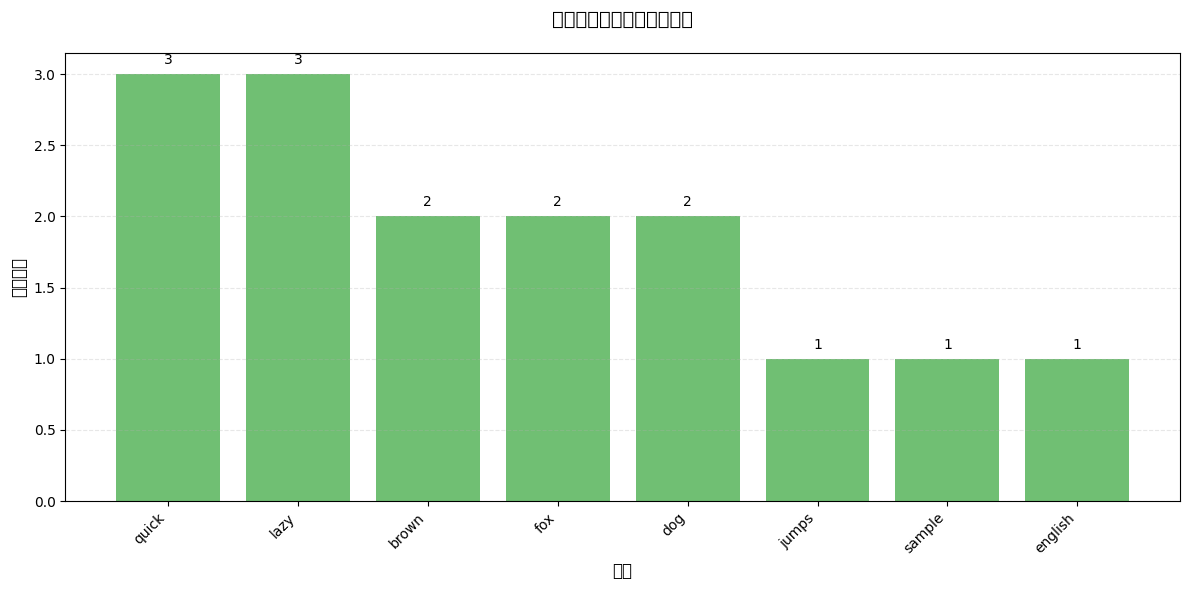


=== 中文清洗结果 ===
['从前', '一只', '小白兔', '住', '美丽', '森林', '里', '一段', '中文', '小说', '文本', '包含', '标点', '停', '用词', '无关', '字符', '小白兔', '很', '可爱', '森林', '里', '很多', '小', '动物', '小白兔', '喜欢', '森林', '里', '跑来跑去']

=== 中文高频词汇 ===
[('小白兔', 3), ('森林', 3), ('里', 3), ('从前', 1), ('一只', 1), ('住', 1), ('美丽', 1), ('一段', 1)]


/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_2112/1041797282.py:48: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整布局
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_2112/1041797282.py:48: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整布局
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_2112/1041797282.py:48: UserWarning: Glyph 20820 (\N{CJK UNIFIED IDEOGRAPH-5154}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整布局
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_2112/1041797282.py:48: UserWarning: Glyph 26862 (\N{CJK UNIFIED IDEOGRAPH-68EE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自动调整布局
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_2112/1041797282.py:48: UserWarning: Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from font(s) DejaVu Sans.
  plt.

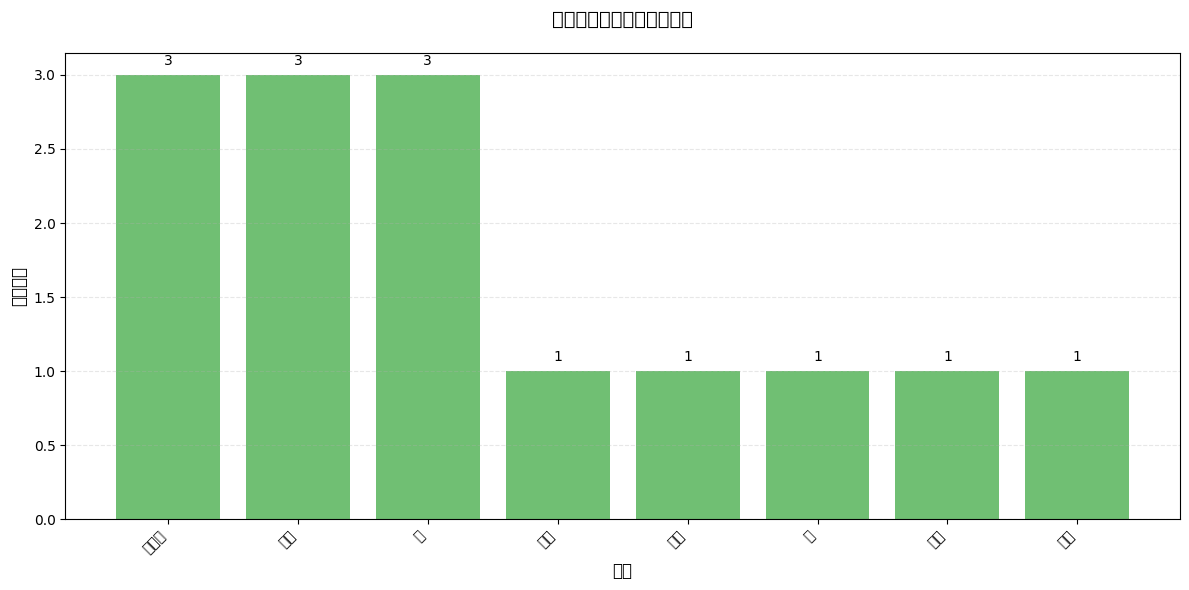

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
# -------------------------- 新增：词频统计函数 --------------------------
def count_word_frequency(cleaned_words, top_n=10):
    """
    统计清洗后词汇的出现频率
    :param cleaned_words: 清洗后的词汇列表
    :param top_n: 展示前N个高频词汇，默认10个
    :return: 包含(词汇, 频次)的列表
    """
    # 使用Counter统计词频
    word_counter = Counter(cleaned_words)
    # 获取前N个高频词汇
    top_words = word_counter.most_common(top_n)
    return top_words

# -------------------------- 新增：词频可视化函数 --------------------------
def plot_word_frequency(word_freq, title, xlabel="词汇", ylabel="出现次数"):
    """
    绘制词频柱状图
    :param word_freq: 包含(词汇, 频次)的列表
    :param title: 图表标题
    :param xlabel: X轴标签
    :param ylabel: Y轴标签
    """
    # 拆分词汇和频次
    words = [item[0] for item in word_freq]
    counts = [item[1] for item in word_freq]
    
    # 创建画布
    plt.figure(figsize=(12, 6))
    
    # 绘制柱状图
    bars = plt.bar(words, counts, color='#4CAF50', alpha=0.8)
    
    # 添加数值标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                 f'{height}', ha='center', va='bottom', fontsize=10)
    
    # 设置图表样式
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45, ha='right')  # 旋转X轴标签，避免重叠
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()  # 自动调整布局
    
    # 显示图表
    plt.show()

# -------------------------- 测试示例 --------------------------
if __name__ == "__main__":
    # 测试英文文本
    en_text = """
    The quick brown fox jumps over the lazy dog! This is a sample English news text, including punctuation, StopWords and uppercase letters. The quick brown fox is very quick, and the lazy dog is very lazy.
    """
    en_cleaned = clean_english_text(en_text)
    print("\n=== 英文清洗结果 ===")
    print(en_cleaned)
    
    # 统计英文词频并可视化
    en_word_freq = count_word_frequency(en_cleaned, top_n=8)
    print("\n=== 英文高频词汇 ===")
    print(en_word_freq)
    plot_word_frequency(en_word_freq, title="英文文本高频词汇词频分布")
    
    # 测试中文文本
    zh_text = """
    从前有一只小白兔，它住在美丽的森林里。这是一段中文小说文本，包含标点、停用词和无关字符！小白兔很可爱，森林里还有很多小动物，小白兔喜欢在森林里跑来跑去。
    """
    zh_cleaned = clean_chinese_text(zh_text)
    print("\n=== 中文清洗结果 ===")
    print(zh_cleaned)
    
    # 统计中文词频并可视化
    zh_word_freq = count_word_frequency(zh_cleaned, top_n=8)
    print("\n=== 中文高频词汇 ===")
    print(zh_word_freq)
    plot_word_frequency(zh_word_freq, title="中文文本高频词汇词频分布")